**(Optioal) CONSENT.** If ok with sharing your Colab for educational purposes, please check the box below with "X".

<mark>[ . . ]</mark> We consent to sharing our Colab (after the assignment ends) with other students/instructors for educational purpose. We understand that sharing is optional and this decision will not affect our grade in any way. 

The data set is similar to [MNIST](https://en.wikipedia.org/wiki/MNIST_database) with each row as a flattened image. However, the digits are not hand-written, but distorted, scaled, shifted, etc.
 
* `dfYX` contains labels (1 or 7) in the first column and pixel brightness intensities in other columns. Each row's 1024 features can be reshaped to 32x32 images of digits
* `dfX ` contains images (as row vectors) only and no labels. Your trained model will derive the labels for these test images. Then you'll submit these to Kaggle.com

In [ ]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all" 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
RunTimeLimit, t0 = 60, time.time() # time limit for your model and starting time
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

pd.set_option('max_rows', 100, 'max_columns', 100, 'max_colwidth', 100, 'precision', 2, 'display.max_rows', 4)
sFile = 'https://github.com/omelnikov/data/blob/main/Recogn17er/trainYX.zip?raw=true'
dfYX = pd.read_csv(sFile, compression='zip', index_col='id')
dfYX

,y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
1,1,216,226,255,212,241,255,255,237,236,255,188,255,255,255,191,255,255,251,192,246,255,247,255,247,255,223,255,247,238,209,255,255,255,255,177,246,255,255,207,245,255,228,215,227,255,228,255,255,250,...,255,255,250,217,255,246,235,255,223,255,255,255,162,255,255,243,157,255,216,226,255,212,241,255,255,237,236,255,188,255,255,255,191,255,255,251,192,246,255,247,255,247,255,223,255,247,238,209,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,1,255,241,255,199,243,240,255,255,194,255,228,255,213,249,215,255,255,215,249,213,255,228,255,194,255,255,240,243,199,255,241,255,255,244,255,205,236,247,255,255,193,255,231,255,217,245,217,255,255,...,217,255,255,217,245,217,255,231,255,193,255,255,247,236,205,255,244,255,255,241,255,199,243,240,255,255,194,255,228,255,213,249,215,255,255,215,249,213,255,228,255,194,255,255,240,243,199,255,241,255
2699,1,255,239,255,240,255,255,249,255,240,255,242,255,255,255,255,252,252,255,255,255,255,242,255,240,255,249,255,255,240,255,239,255,239,255,240,255,251,253,255,248,255,238,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,238,255,248,255,253,251,255,240,255,239,255,239,255,240,255,255,249,255,240,255,242,255,255,255,255,252,252,255,255,255,255,242,255,240,255,249,255,255,240,255,239,255


This test file is missing a column of digit labels, which you need to predict

In [ ]:
dfX = pd.read_csv('https://github.com/omelnikov/data/blob/main/Recogn17er/testX.zip?raw=true', compression='zip', index_col='id')
dfX

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2700,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
2701,230,245,231,233,246,240,247,231,234,255,235,231,233,252,241,242,247,228,244,226,223,228,243,224,250,230,234,241,237,239,222,217,255,225,222,246,251,245,222,243,248,234,247,228,235,231,234,232,234,238,...,238,240,234,244,225,227,227,235,232,215,243,254,223,227,244,219,248,245,236,236,237,230,240,229,237,237,236,243,232,250,241,238,251,247,237,241,228,242,246,230,232,250,232,227,233,220,238,235,228,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,229,226,240,228,235,222,232,225,238,250,238,234,231,237,250,244,222,243,245,242,234,203,232,219,244,240,232,230,226,234,238,239,223,243,221,235,234,248,229,252,243,233,243,229,242,236,241,244,230,238,...,222,237,240,250,238,244,243,241,234,227,243,255,223,238,238,240,224,238,235,240,223,247,236,222,231,238,247,239,227,232,248,237,239,222,239,251,236,238,222,232,225,237,250,218,228,238,222,225,250,243
4499,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


Here are the first few digits.

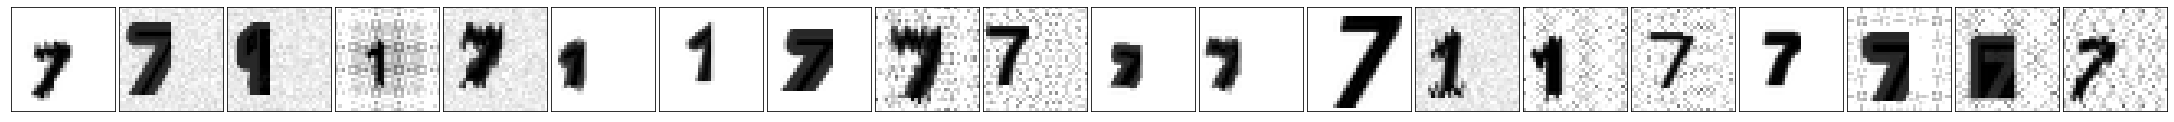

In [ ]:
X = dfX.values
n_col, w = 20, 32  
_ = plt.figure(figsize=(30,12))
for i in range(n_col):
    ax = plt.subplot(1, n_col, i + 1)
    _ = plt.imshow(X[i,].reshape(w,w).astype('float'), cmap='gray')
    _, _ = plt.xticks([]), plt.yticks([]); 
_ = plt.tight_layout(pad=0)
_ = plt.show()

In [ ]:
tmr = Timer()

⏳ started. You have 60 sec. Good luck!


<hr color=red>

<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer - All Start Here...</font></strong>

**Student's Section** (between ⏳ symbols): add your code and documentation here.

## **Task 1. Preprocessing Pipeline**
 
Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc. 
1. Why did you choose these elements? (Something in EDA, prior experience,...? Btw, EDA is not required)
1. How do you evaluate the effectiveness of these elements? 
1. What else have you tried that worked or didn't? 

**Student's answer:**

## **Task 2. Modeling Approach**
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful. 

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements? 
1. What else have you tried that worked or didn't? 

**Student's answer:**

Below is a baseline model that produces the result on Kaggle leaderboard (LB).

In [ ]:
LR = LogisticRegression(random_state=0, n_jobs=-1).fit(dfYX.drop('y', axis=1), dfYX.y)
print(f'IN-sample accuracy is {LR.score(dfYX.drop("y", axis=1), dfYX.y):.3f}')   # training set accuracy
pY = dfX[['1']].rename(columns={'1':'y'}).copy()*0
pY['y'] = LR.predict(dfX)
pY.to_csv('LR_KNN_baseline.csv')

IN-sample accuracy is 0.929


In [ ]:
tm = time.time()-t0
msg = f'Runtime is {tm:.1f}sec'
print(f'\033[91m\033[1m' + msg + f' and exceeds assignment limit of {RunTimeLimit}sec!!!\033[0m' if tm > RunTimeLimit else msg)

Runtime is 5.0sec


# **References:**

1. Remember to cite your sources here as well! At the least, your textbook should be cited. Google Scholar allows you to effortlessly copy/paste an APA citation format for books and publications. Also cite StackOverflow, package documentation, and other meaningful internet resources to help your peers learn from these (and to avoid plagiarism claims).

<font size=5>⌛</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>

<hr color=red>


In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 2 sec


## 💡**Starter Ideas**

1. Tune model hyperparameters
1. Try to linear and non-linear feature normalization: shift/scale, log, divide features by features (investigate scatterplot matrix)
1. Try higher order feature interactions and polynomial features on a small subsample. Then identify key features or select key principal components. The final model can be trained on a larger or even full training sample. You can use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the feature set
1. Do a thorough EDA: look for feature augmentations that result in linear decision boundaries between pairs of classes.
1. Evaluate predictions and focus on poorly predicted "groups":
  1. Strongest missclassifications. E.g. the model is very confident about the wrong label
  1. Evaluate predictions near decision boundaries.
1. Do scatter plots show piecewise linear shape? Can a separate linear model be used on each support, or can the pattern be linearized via transformations?
1. Learn about MNIST dataset and related models.